### Support Vector Machine

Support Vector machine is a supervised algoirthm used to non-linear classification and regression problem to find a hyper-plan (decision boundary) with maximum margin to differentiate classes.

In [81]:
import numpy as np

import matplotlib.pyplot as plotter

from sklearn import svm, datasets

### Logistic Regression

#### Prepare Data
We will use default iris dataset. We will use 2 features for 'x' and labels (iris_dataset.target) as 'y'.

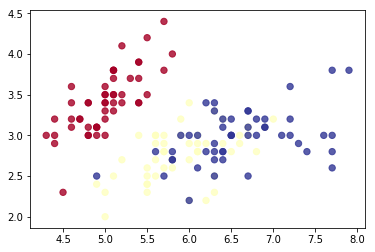

In [82]:
iris_dataset = datasets.load_iris()
x = iris_dataset.data[:, :2]
y = iris_dataset.target

plotter.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plotter.cm.RdYlBu, alpha=0.8)

In [83]:
##svm.SVC()
# 'C' trades off misclassification of training example against decision boundary. Lower C means smoother decision boundary.
# 'gamma' defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.
svc = svm.SVC(kernel='linear', C=1,gamma=0.1).fit(x, y)

#comment above line and uncomment below line to see the affect of rbf (Radius Base Function) kernel affect.
#svc = svm.SVC(kernel='rbf', C=1,gamma=100).fit(x, y)

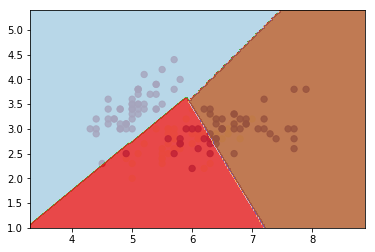

In [84]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = (x_max / x_min)/100
vectored_x, vectored_y = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

plotter.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plotter.cm.RdYlBu, alpha=0.8)

predictions = svc.predict(np.c_[vectored_x.ravel(), vectored_y.ravel()]).reshape(vectored_x.shape)
plotter.contourf(vectored_x, vectored_y, predictions, cmap=plotter.cm.Paired, alpha=0.8)

### Linear Regression

In [85]:
from sklearn.svm import SVR

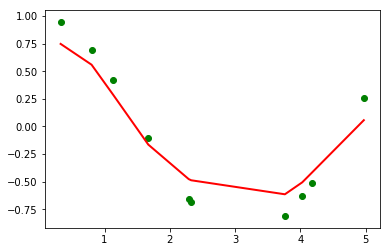

In [86]:
x = np.sort(5 * np.random.rand(10, 1), axis=0)
y = np.cos(x).ravel()

model = SVR(kernel='rbf', C=1.0, epsilon=0.2, gamma=1).fit(x,y)
#comment above line and uncomment one of the below line to see effect of other kernels
#model = SVR(kernel='linear', C=1.0, epsilon=0.2, gamma=1).fit(x,y)
#model = SVR(kernel='poly', C=1.0, epsilon=0.2, gamma=1, degree=3).fit(x,y)


predicted_y = model.predict(x)


plotter.scatter(x, y, color='green', label='data')
plotter.plot(x, predicted_y, color='red', lw=2)
plotter.show()